<a href="https://colab.research.google.com/github/PankajBGadge/Health-insurance-cross-sell-prediction/blob/main/Health_insurance_cross_sell_prediction_ipynseb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# <b>Problem Statement: The main objective is to predict the stock’s closing price of the month. </b>


# **Dataset Information**
# **Variable Description**

'Open': It means the price at which a stock started trading when the opening bell rang..,

'Close':It is the price of an individual stock when the stock exchange closed shop for the day..

'High':It is the highest price at which a stock is traded during a period.

'Low':It is the lowest price of the period



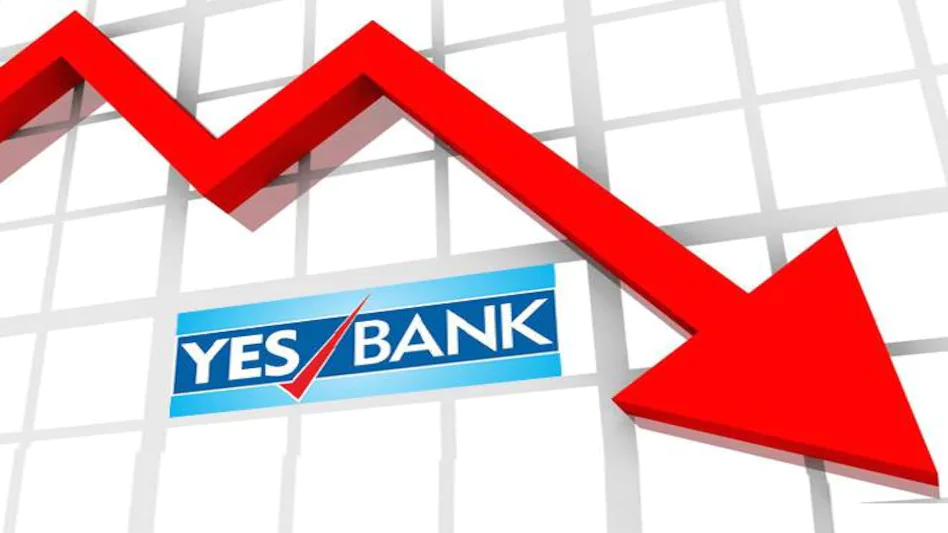

In [3]:
# Importing the libraries
# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**


In [5]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/health insurance cross sell prediction classification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

# **Data Inspection**

Data wrangling  is the process of cleaning and unifying messy and complex data sets for easy access and analysis.

This process typically includes manually converting and mapping data from one raw form into another format to allow for more convenient consumption and organization of the data.

In [6]:
dataset.head(20)

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0    1    Male   44                1         28.0                   0   
1    2    Male   76                1          3.0                   0   
2    3    Male   47                1         28.0                   0   
3    4    Male   21                1         11.0                   1   
4    5  Female   29                1         41.0                   1   
5    6  Female   24                1         33.0                   0   
6    7    Male   23                1         11.0                   0   
7    8  Female   56                1         28.0                   0   
8    9  Female   24                1          3.0                   1   
9   10  Female   32                1          6.0                   1   
10  11  Female   47                1         35.0                   0   
11  12  Female   24                1         50.0                   1   
12  13  Female   41                1         15.0                   1   
13  14    Male   76                1         28.0                   0   
14  15    Male   71                1         28.0                   1   
15  16    Male   37                1          6.0                   0   
16  17  Female   25                1         45.0                   0   
17  18  Female   25                1         35.0                   1   
18  19    Male   42                1         28.0                   0   
19  20  Female   60                1         33.0                   0   

   Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    > 2 Years            Yes         40454.0                  26.0      217   
1     1-2 Year             No         33536.0                  26.0      183   
2    > 2 Years            Yes         38294.0                  26.0       27   
3     < 1 Year             No         28619.0                 152.0      203   
4     < 1 Year             No         27496.0                 152.0       39   
5     < 1 Year            Yes          2630.0                 160.0      176   
6     < 1 Year            Yes         23367.0                 152.0      249   
7     1-2 Year            Yes         32031.0                  26.0       72   
8     < 1 Year             No         27619.0                 152.0       28   
9     < 1 Year             No         28771.0                 152.0       80   
10    1-2 Year            Yes         47576.0                 124.0       46   
11    < 1 Year             No         48699.0                 152.0      289   
12    1-2 Year             No         31409.0                  14.0      221   
13    1-2 Year            Yes         36770.0                  13.0       15   
14    1-2 Year             No         46818.0                  30.0       58   
15    1-2 Year            Yes          2630.0                 156.0      147   
16    < 1 Year            Yes         26218.0                 160.0      256   
17    < 1 Year             No         46622.0                 152.0      299   
18    1-2 Year            Yes         33667.0                 124.0      158   
19    1-2 Year            Yes         32363.0                 124.0      102   

    Response  
0          1  
1          0  
2          1  
3          0  
4          0  
5          0  
6          0  
7          1  
8          0  
9          0  
10         1  
11         0  
12         0  
13         0  
14         0  
15         1  
16         0  
17         0  
18         0  
19         1

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
dataset.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

# **Data Processing**

**Checking for null values**

In [9]:
dataset.isna().sum()


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Checking Duplicates Data**

In [10]:
len(dataset[dataset.duplicated()])

0

# **Outliers**

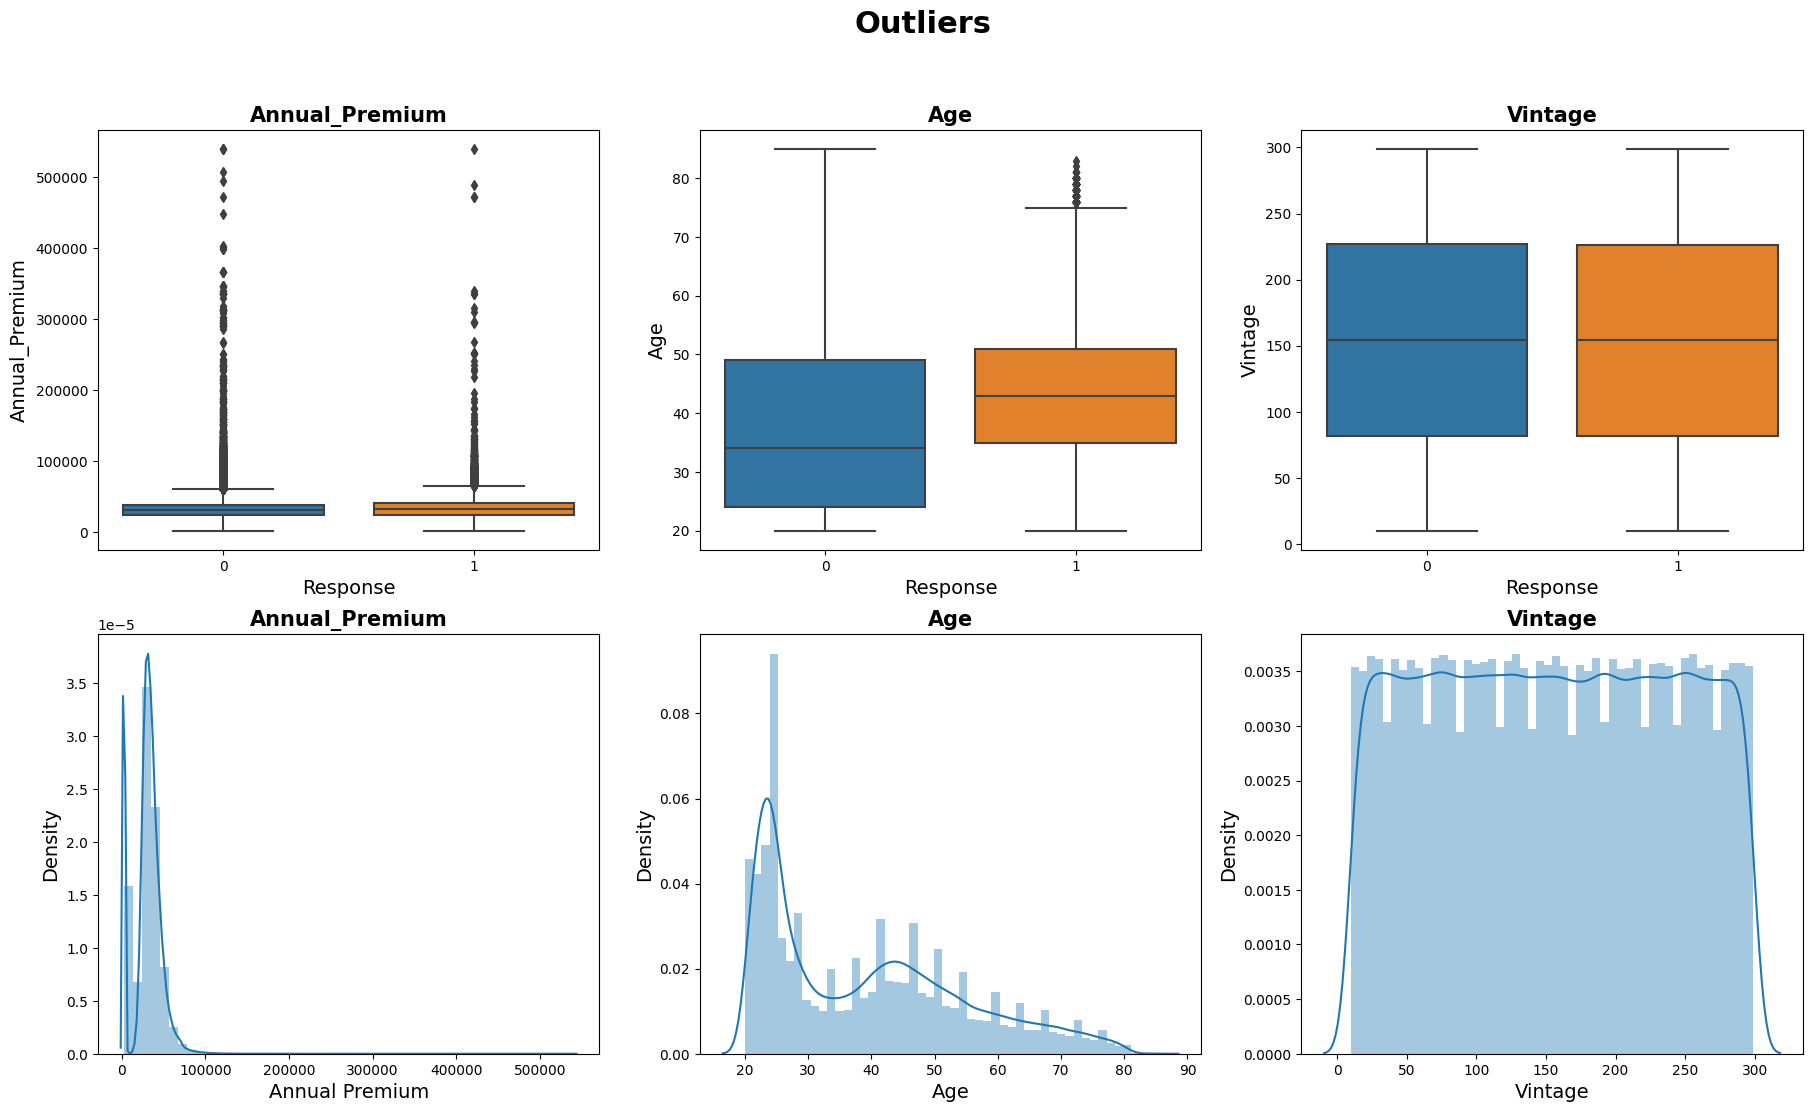

In [17]:
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = dataset)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = dataset)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = dataset)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = dataset['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = dataset['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = dataset['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(dataset)

From the above plot it can be implied that Annual Premium has a poitively skewed distribution.

From above we can also depict that Vintage has a approximatly uniform distribution.

Age columns has some outliers but we are not going to treat them because it won't be affecting our result.

# **Outlier Treatment and Feature Scaling**

For Outlier treatment we will be applying quantile method.

For feature Scaling we will be using MinMaxScaler technique for Normlization.

In [18]:
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(dataset)
scale_features(dataset)

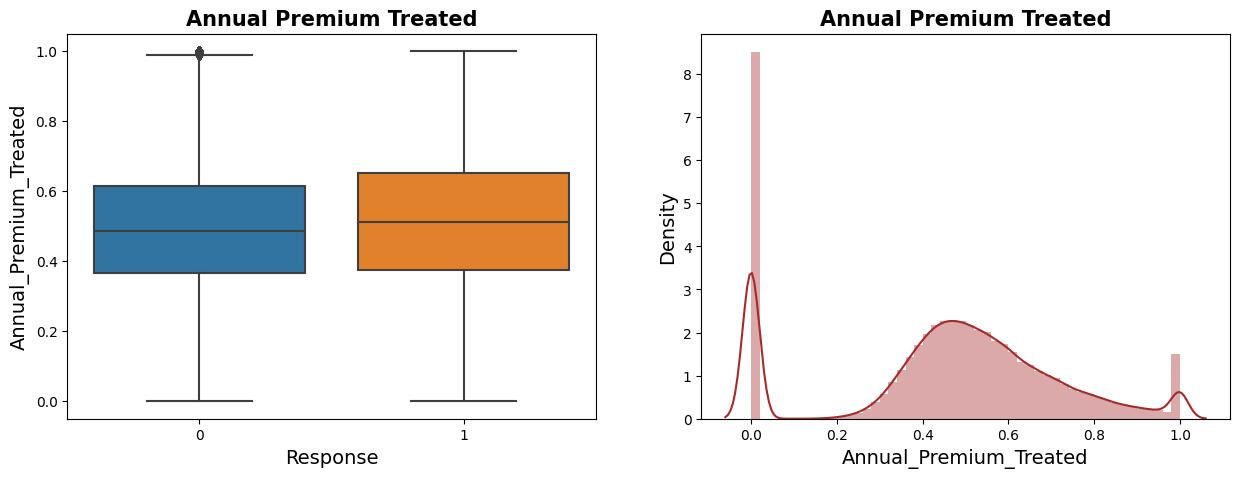

In [19]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(dataset)

From the above plots we can see that there are no more outliers in Annual Premium.

# **Exploratory Data Analysis**

**Exploring the Numerical Features**

We have 4 numerical features: Age, Policy_Sales_Channel, Region_Code, Vintage. Without any further delay, let's explore these features.

In [21]:
def show_distribution_numerical_features(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'Age', data = df, hue='Response')
    axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'Region_Code', data = df, hue='Response')
    axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Region_Code',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = df, hue='Response')
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][1], x = dataset['Vintage'],data = df, hue='Response')
    axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Numerical Features', fontsize = 22, fontweight = 'bold' )

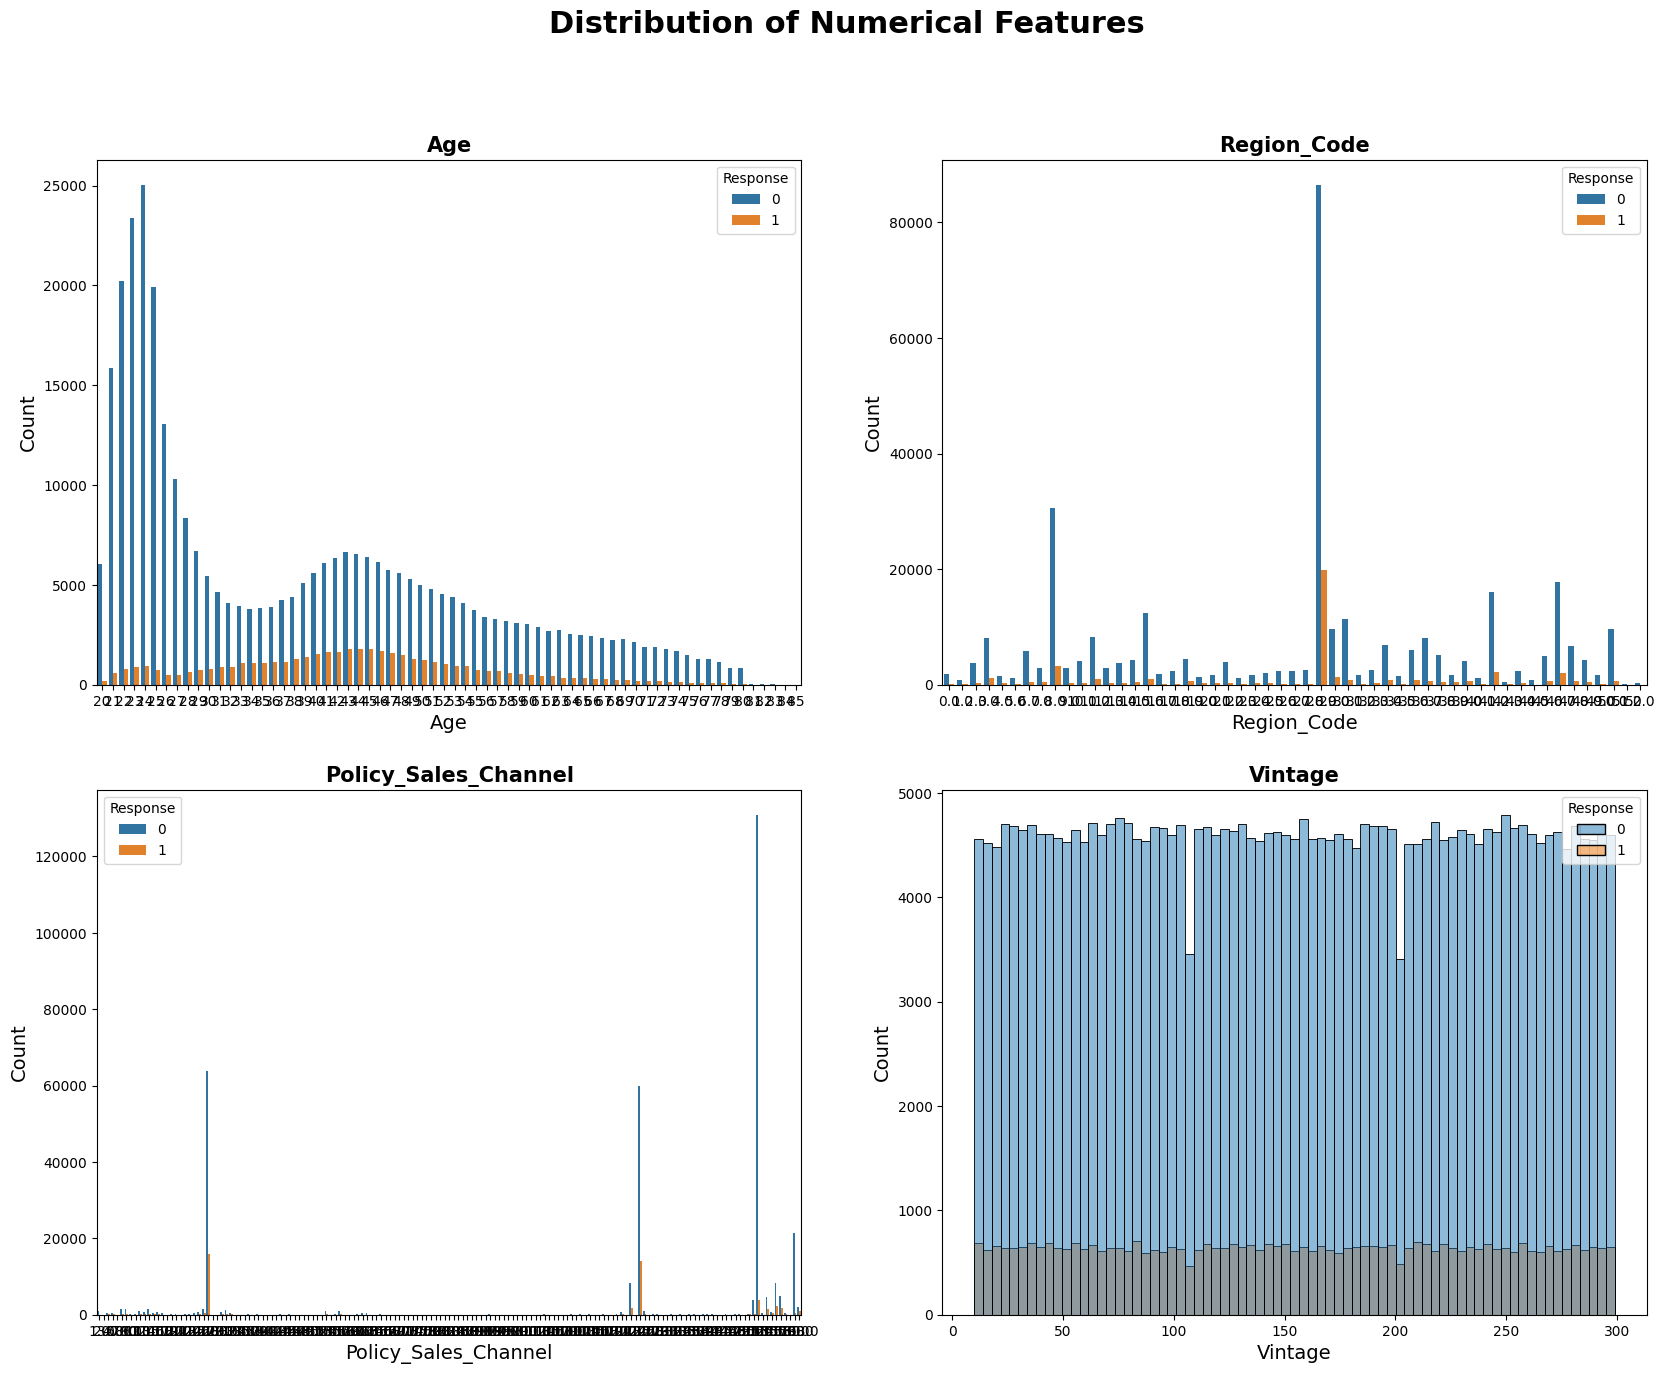

In [40]:
show_distribution_numerical_features(dataset)

In [22]:
def show_violin_distribution(df):

    sns.catplot(y = 'Age', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    plt.title('Age Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Region_Code', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Region_Code', fontdict={'fontsize': 14})
    plt.title('Region Code Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Policy_Sales_Channel', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    plt.title('Policy Sales Channel Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

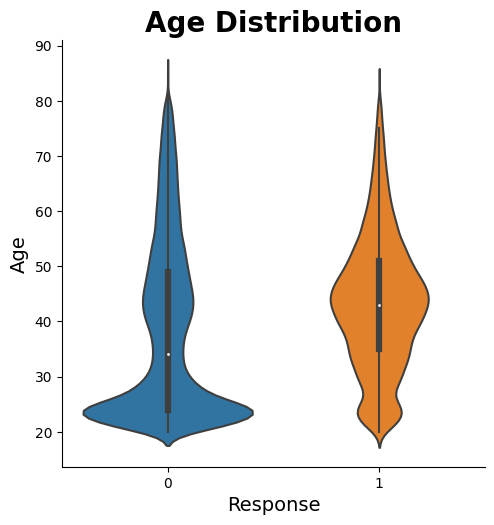

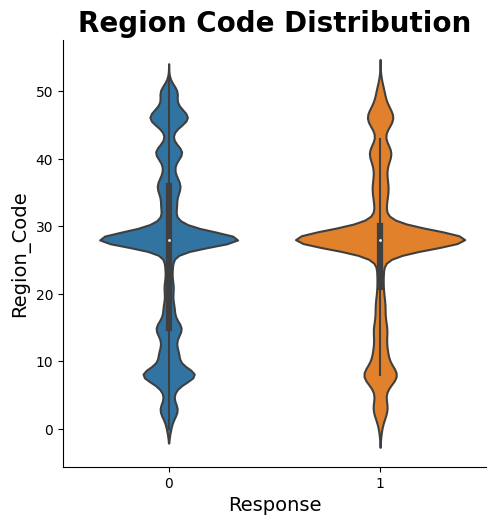

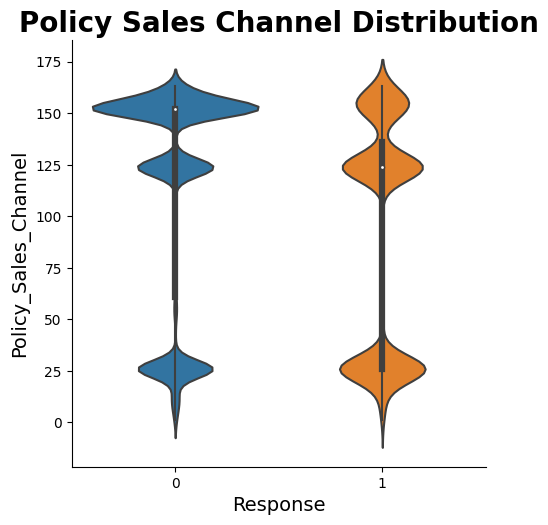

In [41]:
show_violin_distribution(dataset)

From the above graphical representation we can conclude on a few points:

As we can see, we have a huge dispersion of data in Age feature, so in order to gain better insights on Age feature, we can convert it into categories as YoungAge, MiddleAge and OldAge.
Similarly, we can also categorize Region Code and Policy_Sales_Channel.

**Converting Numerical Columns to Categorical**

In [61]:
def convert_numerical_to_categorical(df):
    # Categorizing Age feature
    df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

    # Categorizing Policy_Sales_Channel feature
    x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
    res = dict(zip(x.keys(),x.values))
    df['Region_Code_Categorical'] = df['Region_Code'].map(res) 
    # df.Region_Code_Categorical.value_counts()

convert_numerical_to_categorical(dataset)



In [62]:
def show_distribution_num_to_cat(df):    
    fig, axes = plt.subplots(1,3, figsize=(22,5))

    sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Categorical', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )

ValueError: ignored

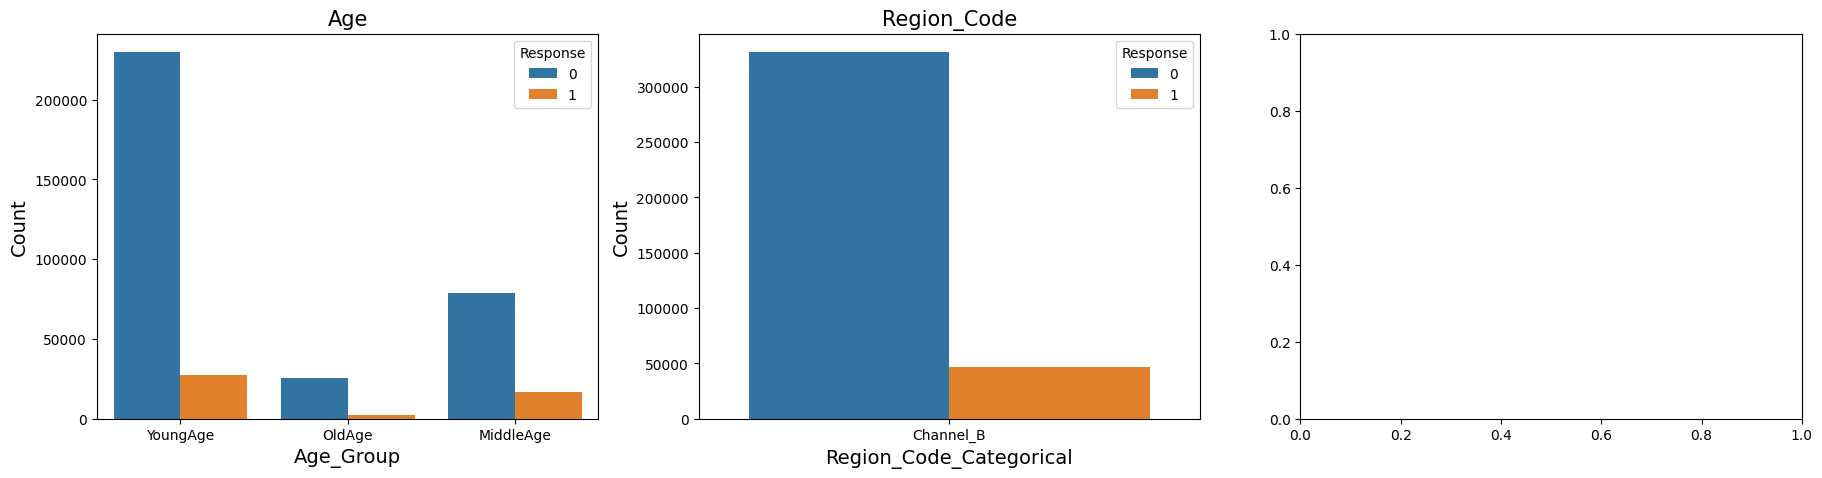

In [64]:
show_distribution_num_to_cat(dataset)

Observations:

We can see that Customers belonging to YoungAge group are more likely not interested in taking the vehicle insurance.
Similarly, Region_C and Channel_A Customers has the highest chances of not taking the vehicle insurance.

**Gender Distribution**

In [67]:
def show_gender_response_relation(df):
    sns.catplot(x="Response", hue="Gender", kind="count",
                palette="pastel",
                data=df)
    plt.xlabel('Response', fontdict={'fontsize':12})
    plt.ylabel('Count',fontdict={'fontsize': 14})
    plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})

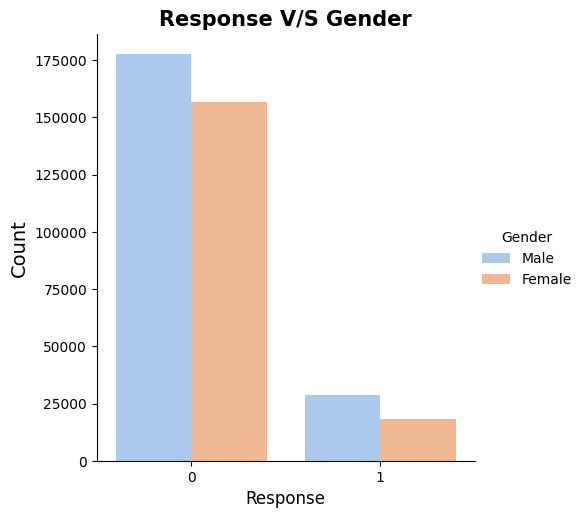

In [68]:
show_gender_response_relation(dataset)

For the above plot, we can say that the no. of male customers in our data set is higher than female customers.

**Exploring the Age Feature**

In [66]:
def show_age_relations(df):
    fig, axes = plt.subplots(1,3, figsize=(25,8))
    sns.countplot(ax = axes[0],x="Response", hue="Age_Group", palette="pastel",
            data=df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.histplot(ax = axes[1],binwidth=0.5, x="Age_Group", 
                 hue="Previously_Insured", data=df, 
                 stat="count", multiple="stack")
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Age_Group V/S Previously_Insured', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.lineplot(ax = axes[2], x="Age",y="Annual_Premium_Treated",
                 data=df,hue="Gender")
    axes[2].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[2].set_title('Age V/S Annual Premium Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

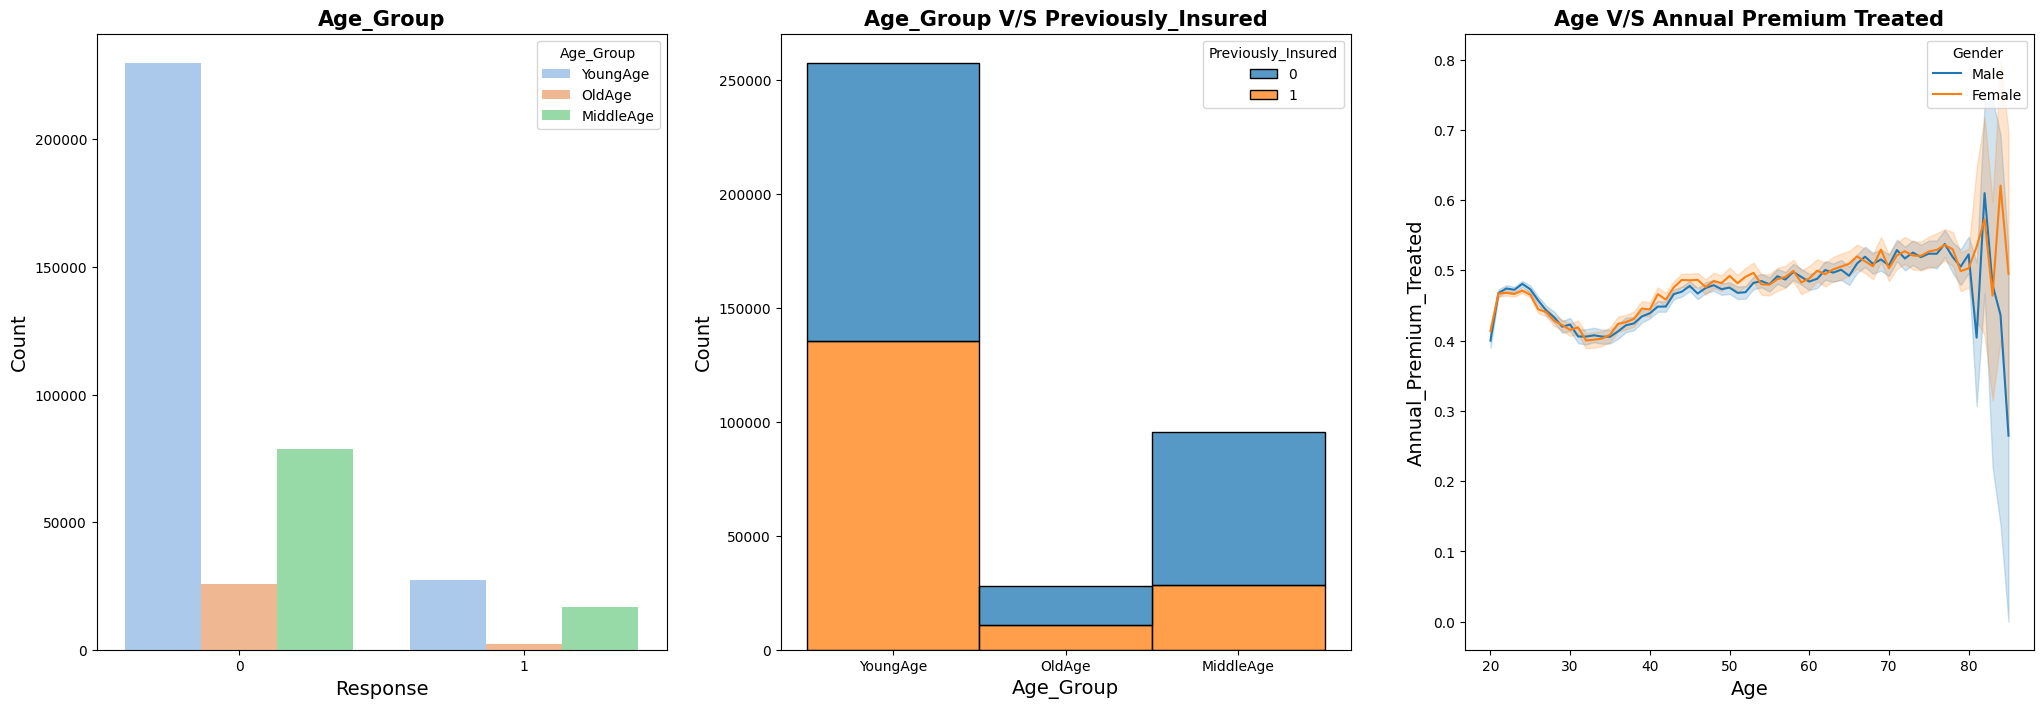

In [69]:
show_age_relations(dataset)

Observation:

From the first plot, we can see the Responses received from the different Age_Group.

Second plot shows the number of customers of different age group having or not having vehicle insurance.

We can say that the customers of YoungAge and OldAge are equally likely to have/not have vehicle insurance whereas customers of MiddleAge has the highest chances of not having a previously insured vehicle insurance.

From the third plot, we can see the relation between Age and their Annual_Premium for both Male and Female customers.

**Exploring Vehicle Damage**

In [27]:
def vehicle_damage_distribution(df):
    fig = px.pie(df, values='Response', names='Vehicle_Damage', title='Vehicle Damage Distribution')
    fig.show()

In [70]:
vehicle_damage_distribution(dataset)

In [28]:
def show_vechile_damage_relations(df):
    fig, axes = plt.subplots(1,2, figsize=(22,8))
    sns.pointplot(ax = axes[0], x="Vehicle_Damage", y="Response", hue="Vehicle_Age", aspect=.7,
            kind="point", data=df)
    axes[0].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_title('Vehicle_Damage V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})
    
    sns.pointplot(x = 'Vehicle_Damage', y = 'Annual_Premium_Treated', data=df, kind = 'point')
    axes[1].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Vehicle_Damage V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

TypeError: ignored

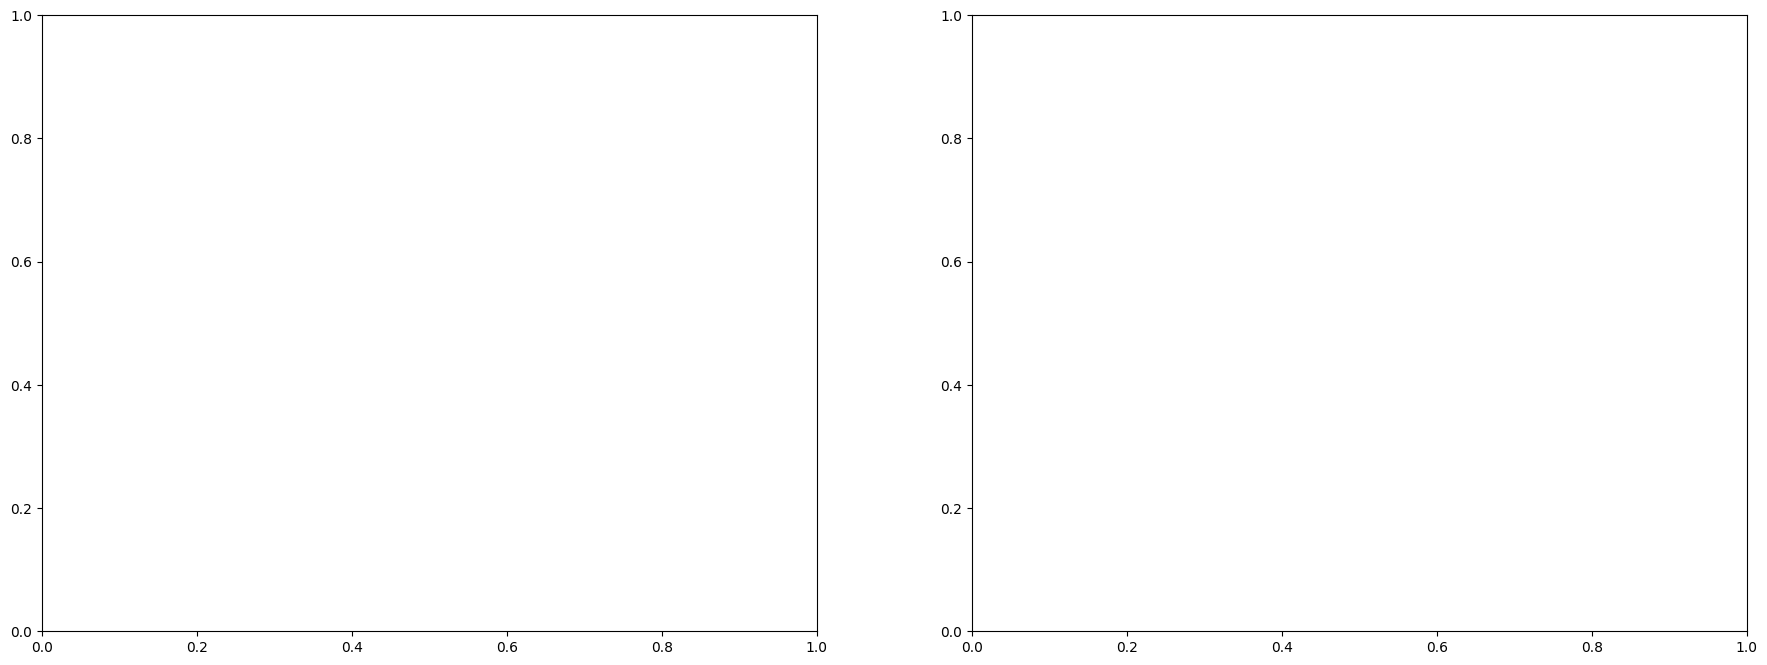

In [72]:
show_vechile_damage_relations(dataset)

In [29]:
def vehicle_age_distribution(df):
    plt.figure(figsize=(10, 8))
    sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="Dark2")
    plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})

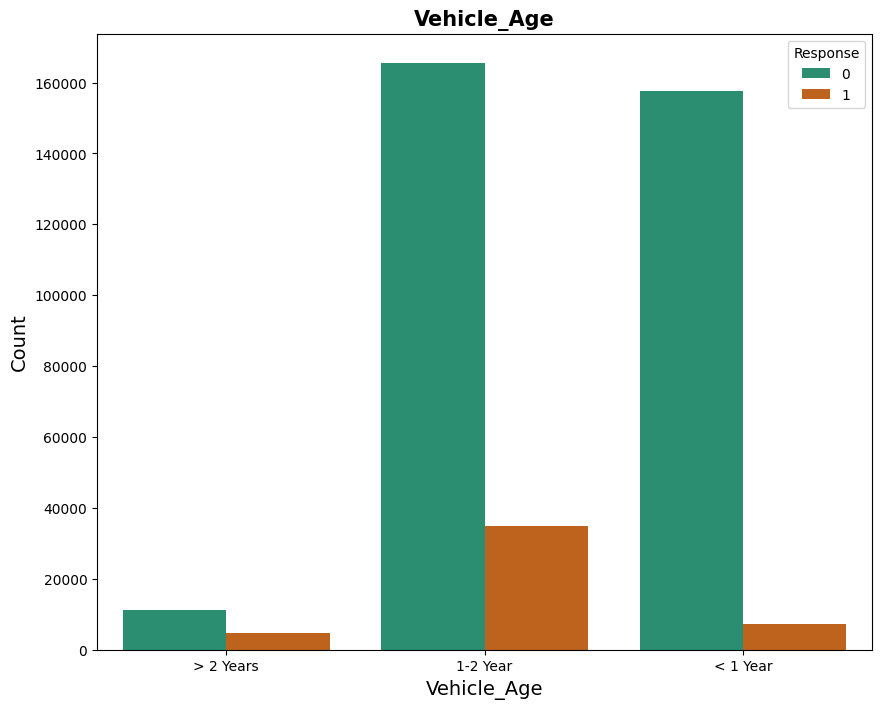

In [73]:
vehicle_age_distribution(dataset)

In [75]:
def show_vehicle_age_relation(df):
    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.barplot(ax = axes[0][0], x = 'Vehicle_Age', y='Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], y = 'Response', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df)
    axes[0][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][2], y = 'Response', x = 'Vehicle_Age', hue = 'Region_Code_Categorical', data=df)
    axes[0][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[1][0], y = 'Response', x = 'Vehicle_Age', hue = 'Policy_Sales_Channel', data=df )
    axes[1][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.boxplot(ax = axes[1][1], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][2], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

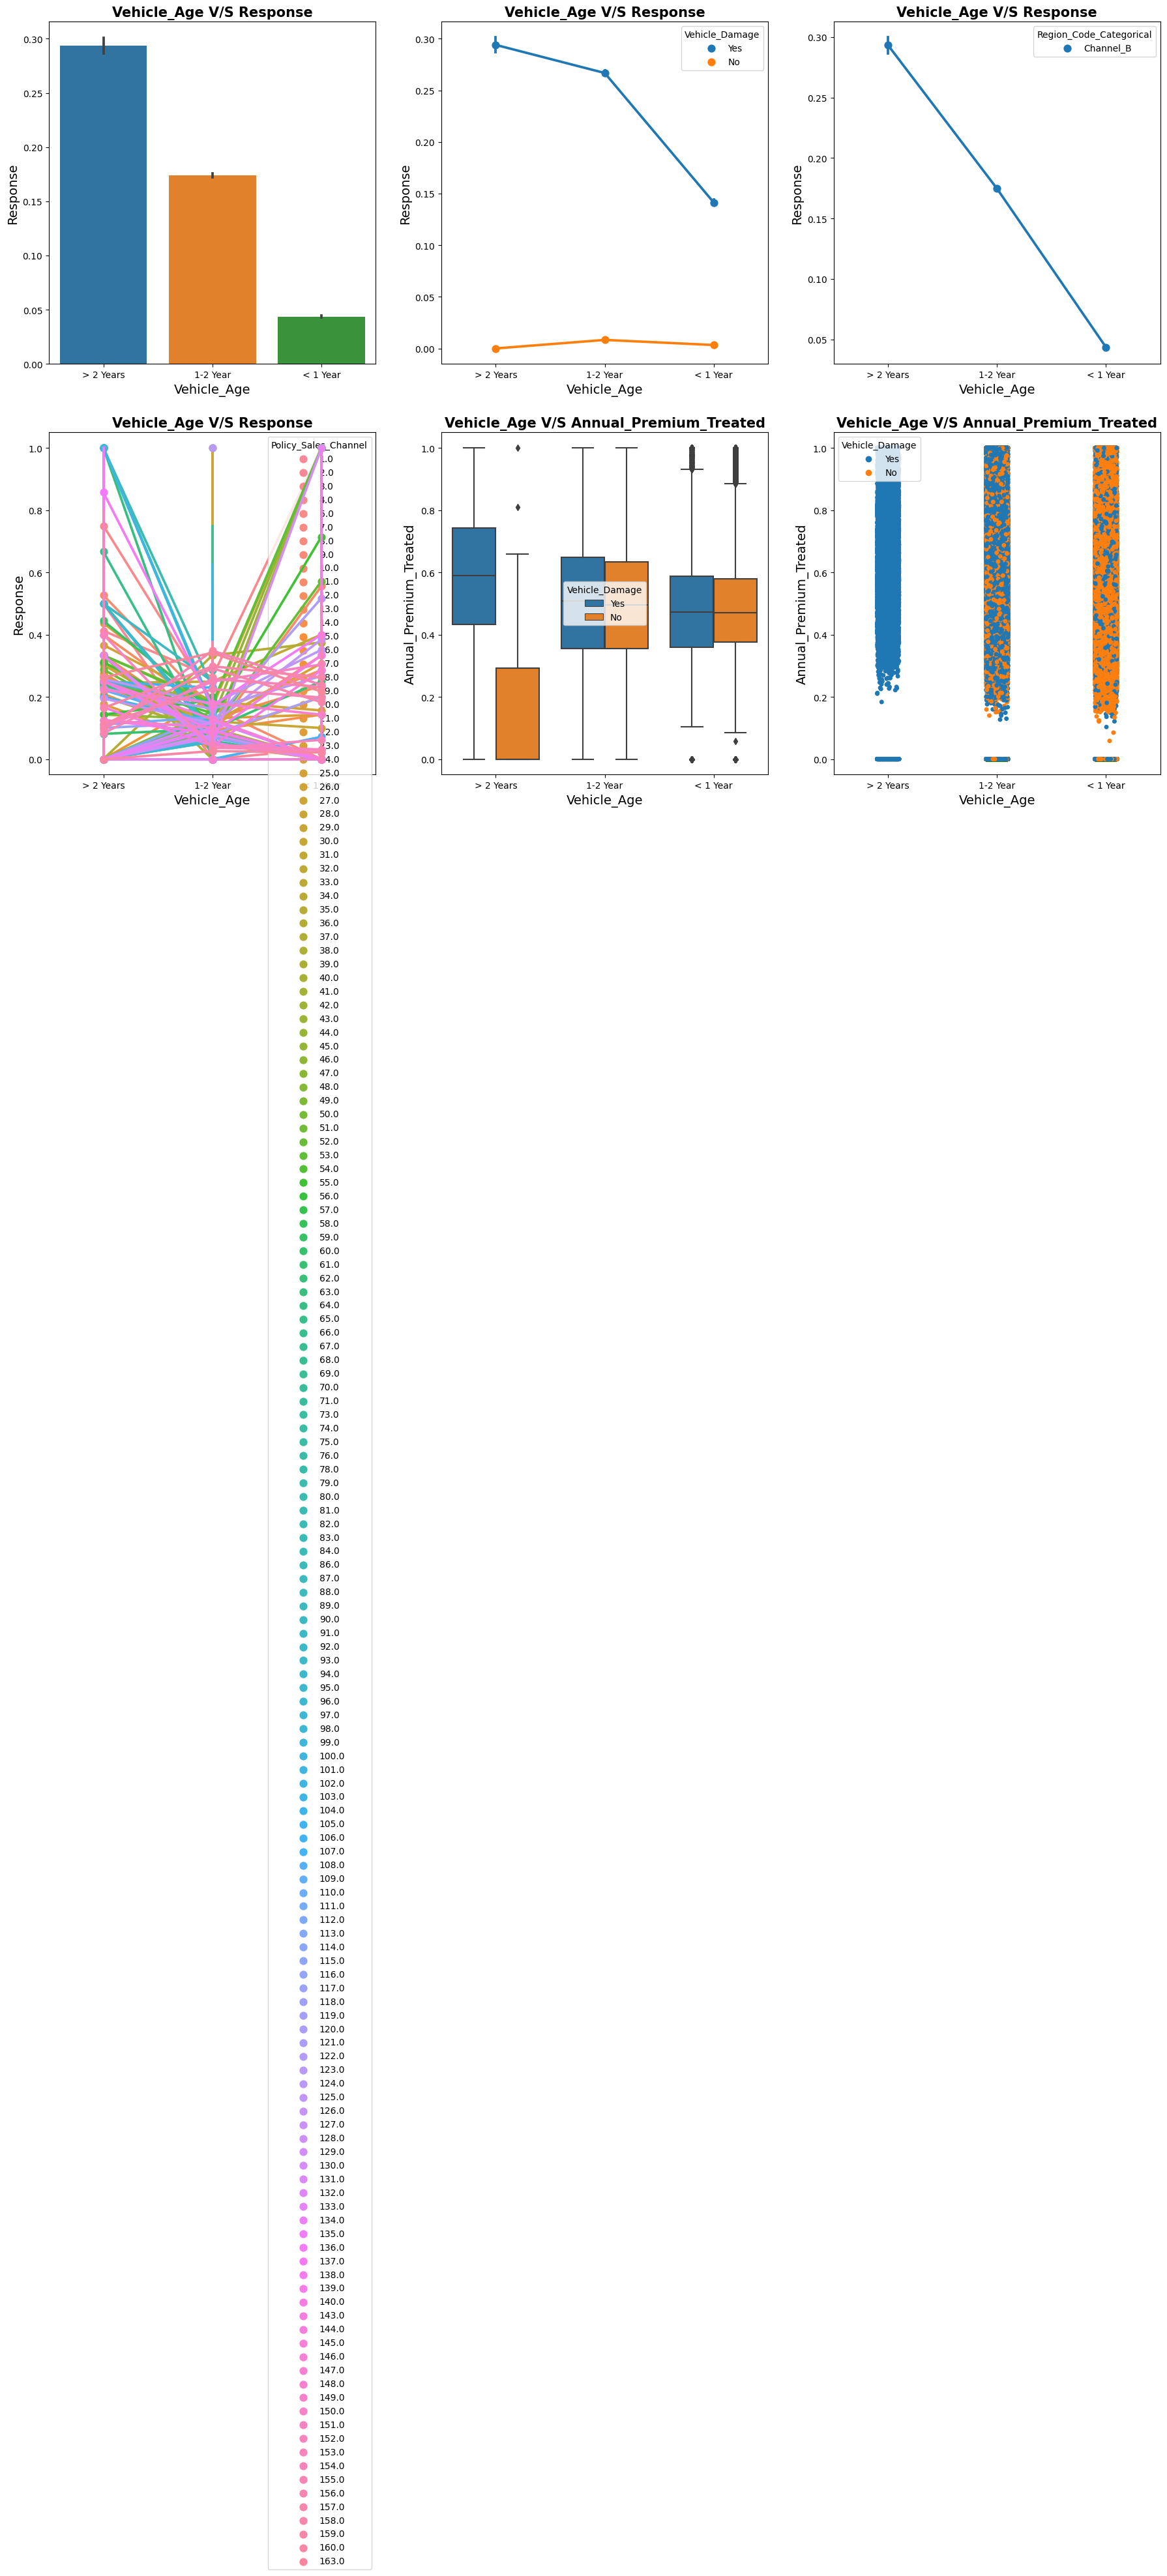

In [76]:
show_vehicle_age_relation(dataset)

Observations:

From the first bar plot, we can see the number of customers of VehicleAge group, took/didn't take the vehicle insurance.
The first two plots of the above grid shows the possibility of taking vehicle insurance belonging to a particular VehicleAge group.
The third plot of the above grid shows the possibility of taking vehicle insurance belonging to a particular VehicleAge group based on their RegionCode.
The fourth plot of the above grid shows the possibility of taking vehicle insurance belonging to a particular VehicleAge group based on their PolicySalesChannel group.
From the box plot of the above grid, we can see the relation of Vehicle_Age group and Annual_Premium based on their Vehicle_Damage response.
The strip plot shows that the customers having vehicle age >2 Years have the higher chances of taking vehicle insurance.

**Exploring Annual Premium**

In [31]:
def show_annual_premium_relation(df):
    fig, axes = plt.subplots(2,2, figsize=(15,12))

    sns.pointplot(ax = axes[0][0], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[0][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.swarmplot(ax = axes[1][0], x = 'Response', y = 'Annual_Premium_Treated', data = df[:1000])
    axes[1][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[1][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

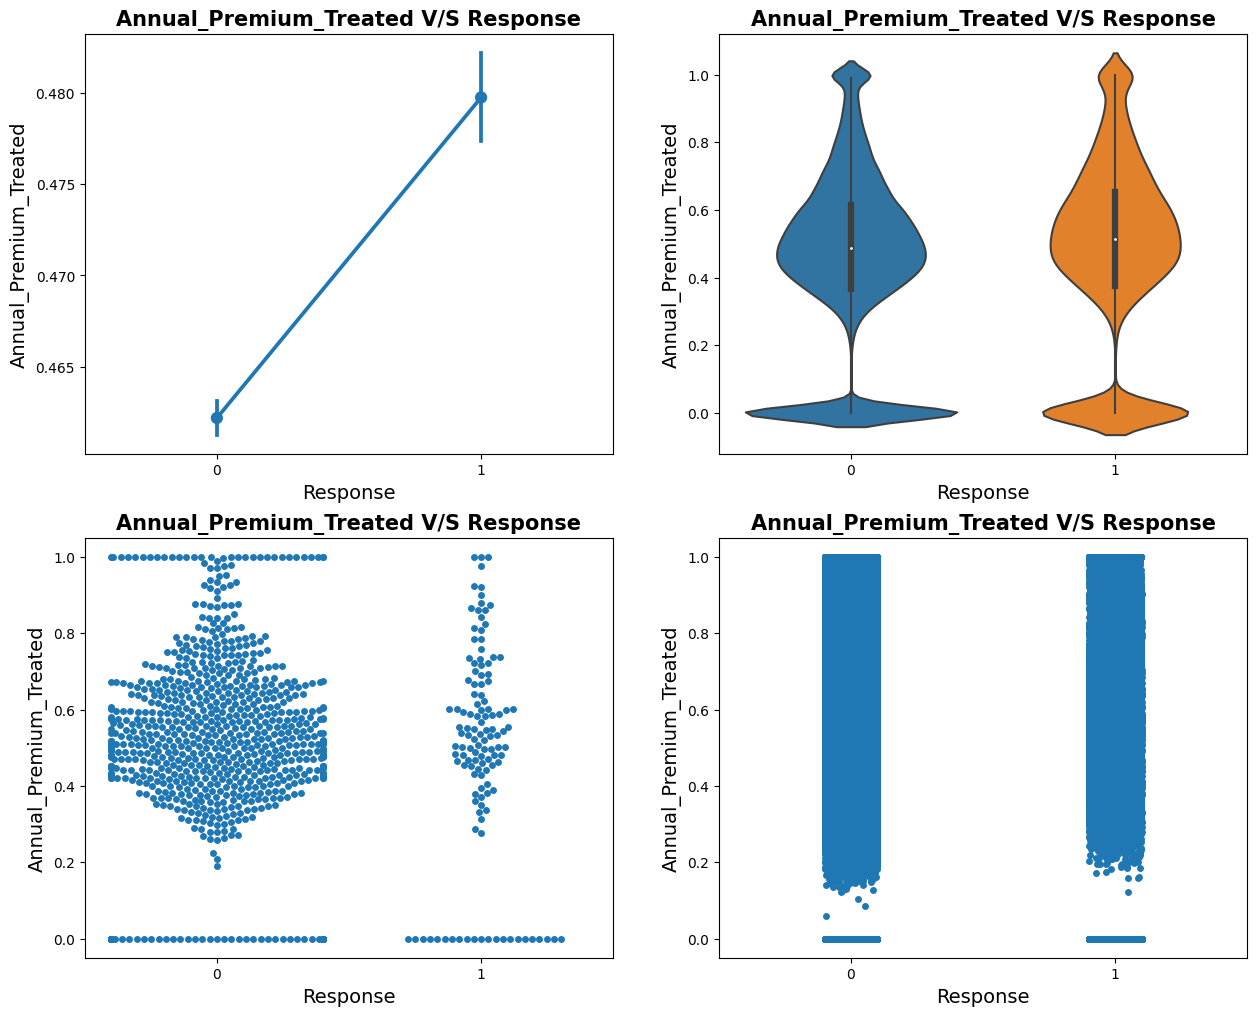

In [77]:
show_annual_premium_relation(dataset)

Observations:

From the point plot, we can say that if the Annual_Premium is more then they are more likely to take the vehicle insurance.
Second plot also shows the same thing with violin plot.
Third plot shows the plattern of responses based on Annual_Premium.
Fourth plot is the strip plot for Annual_Premium and Responses.

**Annual Premium and Age**

In [79]:
def show_annual_premium_with_age_group(df):
    fig, axes = plt.subplots(1,2, figsize=(15,8))

    sns.barplot(ax = axes[0],y = 'Annual_Premium_Treated', x = 'Age_Group', data= dataset)
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[1], y = 'Annual_Premium_Treated', x = 'Age_Group', data= df)
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

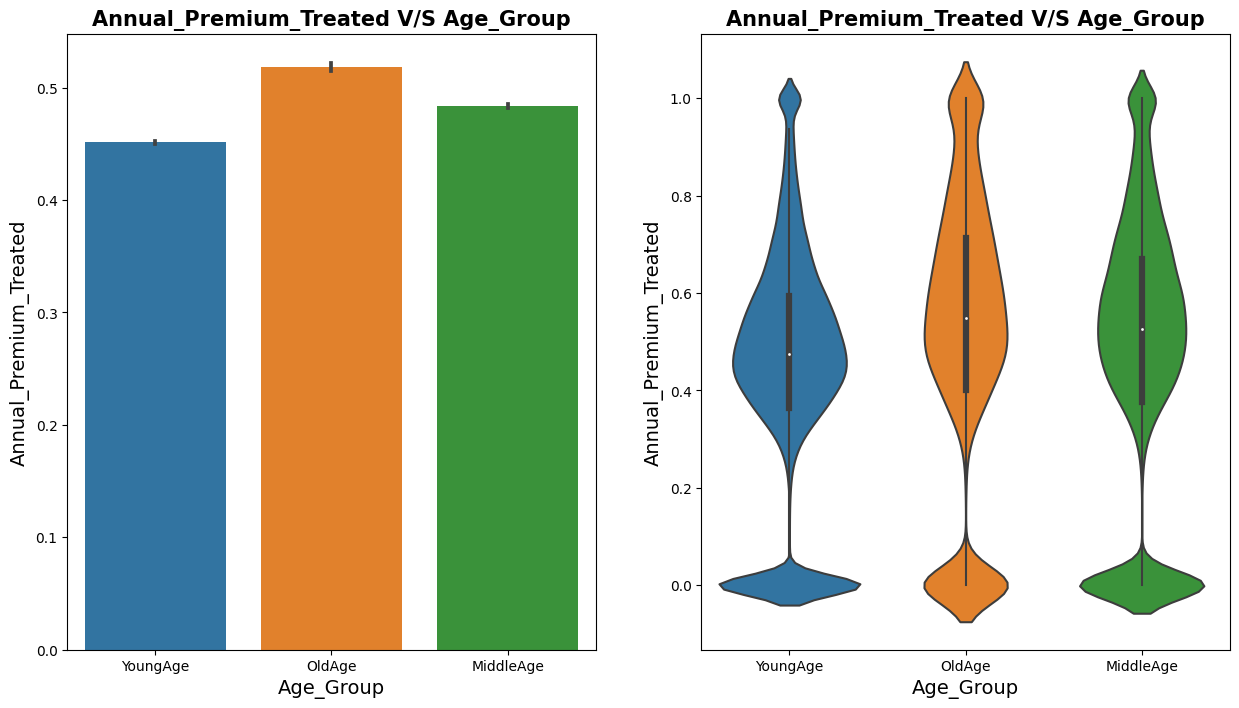

In [80]:
show_annual_premium_with_age_group(dataset)

Observations:

First plot shows the Annual_Premium of people based on their Age.
Second plot shows the same but the data points are categorized by Region_Code.

**Age Group**

In [34]:
def show_age_annual_premium_relation(df):

    plt.figure(figsize = (14,9))
    plt.hexbin(data=dataset, x='Age',y='Annual_Premium_Treated',gridsize = 30, cmap ='Greens')
    plt.title('Annual Premium V/S Age', fontdict={'fontsize': 15, 'fontweight':'bold'})
    plt.ylabel('Annual Premium Treated',fontdict={'fontsize': 14})
    plt.xlabel('Age', fontdict={'fontsize': 14})
    plt.show()


    fig = px.scatter(df, x="Age", y="Annual_Premium",
                    color="Region_Code_Categorical",
                    size_max=180,opacity=0.3, title='Age V/S Annual Premium')
    fig.show()

In [35]:
def age_group_distribution(df):
    fig, axes = plt.subplots(1,3, figsize=(15,6))

    colors = sns.color_palette('pastel')[0:4]
    explode = (0.01, 0.25, 0.01)
    axes[0].pie( x= df.groupby('Age_Group')['Response'].sum(),explode=explode, 
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%', 
            shadow=True);
    axes[0].set_title('with Response', fontsize = 15, fontweight ='bold', pad=15)

    axes[1].pie(x=df.groupby('Age_Group')['Annual_Premium'].sum(),explode=explode, 
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%', 
            shadow=True);
    axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)

    axes[2].pie(x=df.groupby('Age_Group')['Previously_Insured'].sum(),explode=explode, 
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%', 
            shadow=True);
    axes[2].set_title('with Previously_Insured', fontsize = 15, fontweight ='bold', pad=15)

    plt.suptitle('Age Group Distribution',fontsize = 20, fontweight ='bold')

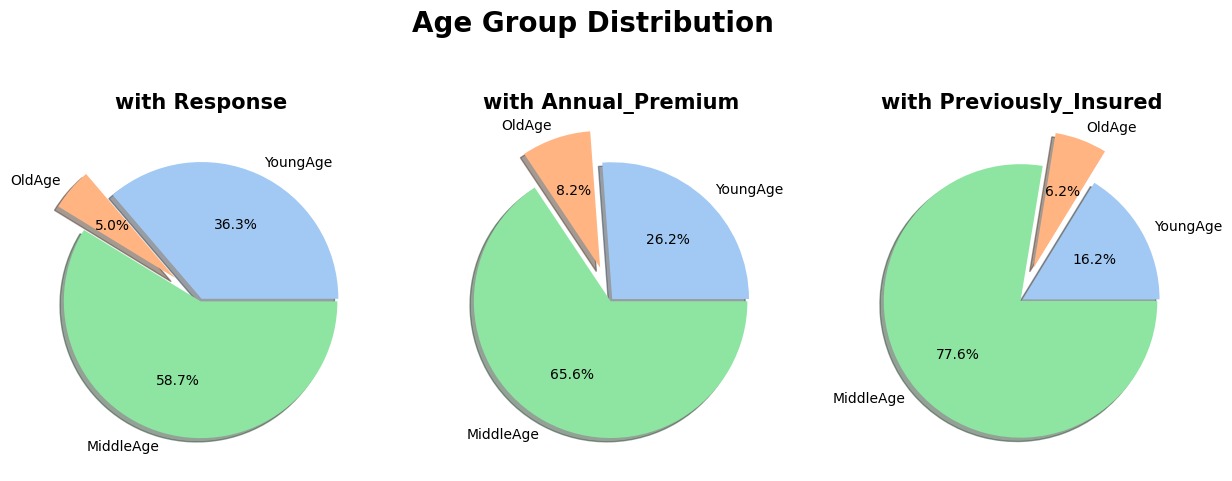

In [81]:
age_group_distribution(dataset)

In [83]:
def show_region_code_distribution(df):

    colors = sns.color_palette('pastel')[0:4]
    explode = (0.01, 0.01, 0.01)

    fig, axes = plt.subplots(1,2, figsize=(15,6))
    axes[0].pie(x=df.groupby('Region_Code_Categorical')['Vintage'].sum(),explode=explode, 
                labels=dataset['Region_Code_Categorical'].unique(), colors=colors,autopct='%1.1f%%', 
                shadow=True);
    axes[0].set_title('with Vintage', fontsize = 15, fontweight ='bold', pad=15)

    axes[1].pie(x=df.groupby('Region_Code_Categorical')['Annual_Premium_Treated'].sum(),explode=explode, 
                labels=dataset['Region_Code_Categorical'].unique(), colors=colors, autopct='%1.1f%%', 
                shadow=True);
    axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)

    plt.suptitle('Region Code Distribution',fontsize = 15, fontweight ='bold')


ValueError: ignored

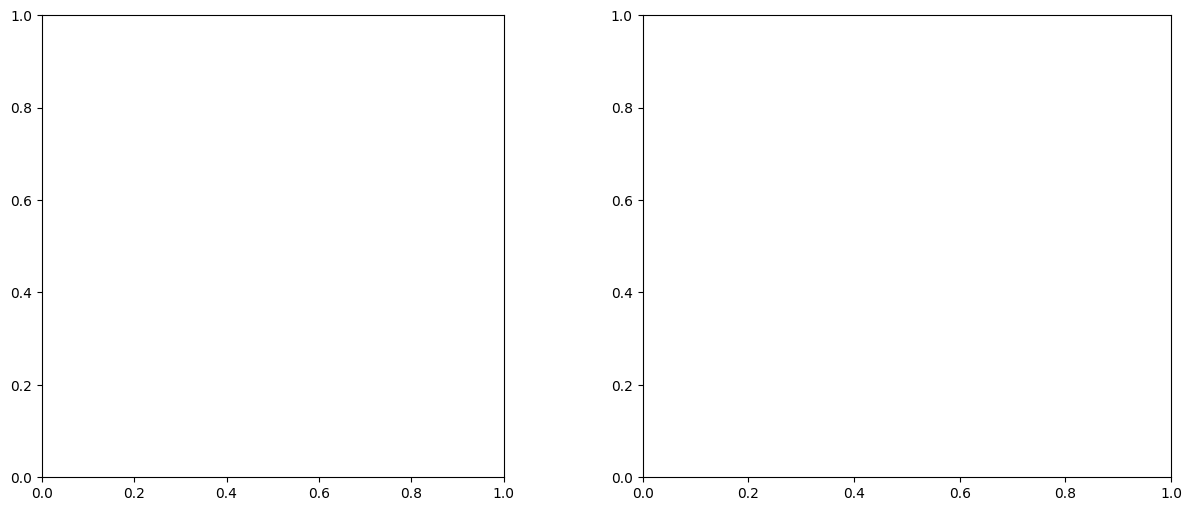

In [84]:
show_region_code_distribution(dataset)

Observations:

The above three pie plots shows the distribution of Age_Group in the Data set based on Response, Annual_Premium and Previously_Insured.
The above two pie plots shows the distribution of Region_Code in the Data set based on Vintage and Annual_Premium.

**Exploring Policy Sales Channel**

In [38]:
def show_policy_sales_channel_relation(df):

    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.pointplot(ax = axes[0][0], x='Policy_Sales_Channel_Categorical', y='Vintage',data=df)
    axes[0][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][0].set_title('Policy_Sales_Channel V/S Vintage', 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], x='Policy_Sales_Channel_Categorical', y='Annual_Premium_Treated',data=df)
    axes[0][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Policy_Sales_Channel V/S Annual_Premium_Treated', 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    df['Policy_Sales_Channel_Categorical'].value_counts().plot(ax = axes[0][2] ,kind='barh')
    axes[0][2].set_xlabel(xlabel = 'Count', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][2].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1][0],x="Policy_Sales_Channel_Categorical", hue="Response", data=df, stat="count", 
                 multiple="stack",binwidth=0.5)
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    groupPolicySalesBySum=df.groupby(by=["Policy_Sales_Channel_Categorical"]).sum().reset_index()
    sns.barplot(ax = axes[1][1], x="Policy_Sales_Channel_Categorical", y="Response", data=groupPolicySalesBySum)
    axes[1][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})


    sns.barplot(ax = axes[1][2], x='Policy_Sales_Channel_Categorical', y='Response', data=df, hue='Region_Code_Categorical')
    axes[1][2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][2].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

ValueError: ignored

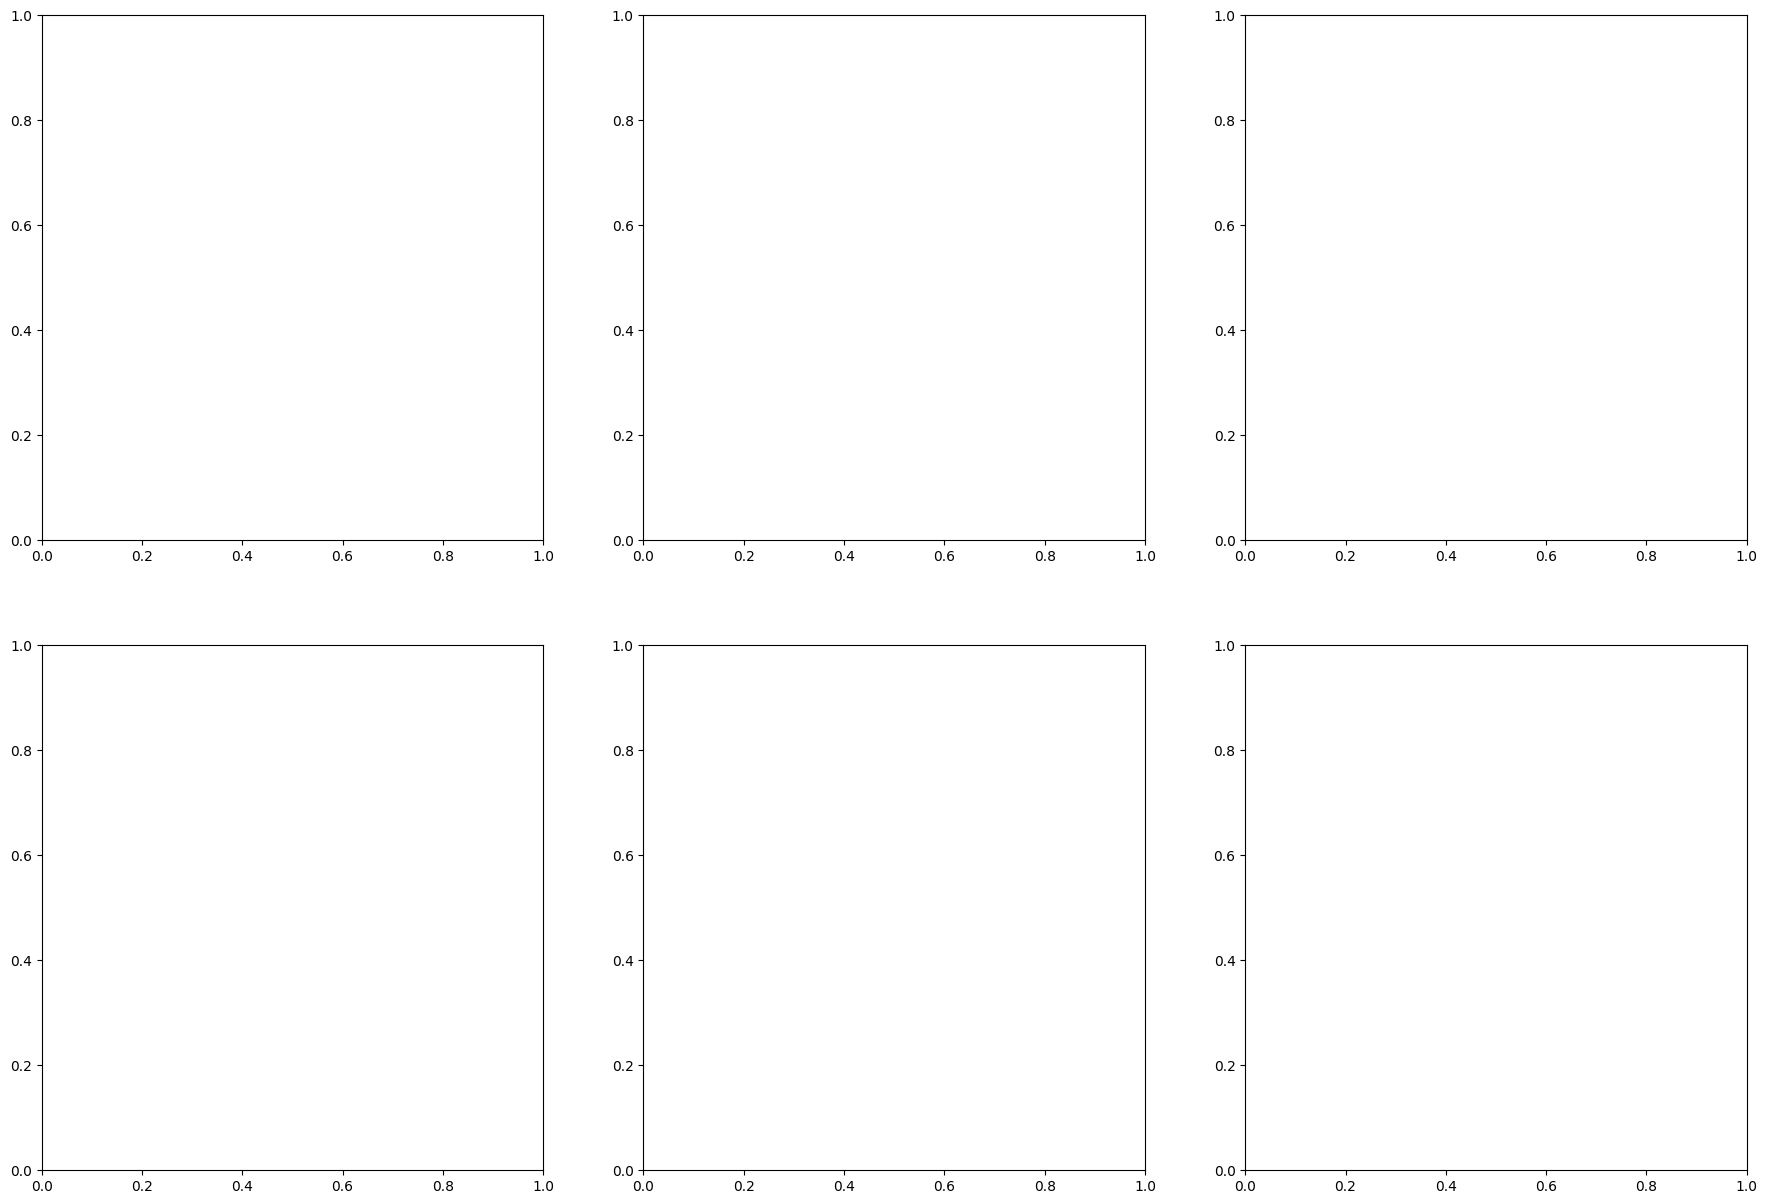

In [85]:
show_policy_sales_channel_relation(dataset)

Observations:

The two point plots shows the distribution of Policy_Sales_Channel based on Vintage and Annual_Premium_Treated.
The next three bar plots shows the number of data points belonging to a particular channel based on Responses.
The last bar plot shows the probability of a customer taking vehicle insurance based on Policy_Sales_Channel and Region_Code.

**Distribution Plots Based on Future**

The below plots shows the distribution of data points based on different features.

In [39]:
def count_each_categorical_feature(df):
    categorical_columns = ['Gender', 'Age_Group', 'Region_Code_Categorical', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Policy_Sales_Channel_Categorical']

    fig, axes =  plt.subplots(2, 7, figsize=(45, 15))
    for i in range(7):
        sns.countplot(data = df[df['Response']==1], x=categorical_columns[i], ax=axes[0][i])
        axes[0][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[0][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
        axes[0][i].set_title(categorical_columns[i], 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

        sns.countplot(data = df[df['Response']==0], x=categorical_columns[i], ax=axes[1][i])

        axes[1][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[1][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
        axes[1][i].set_title(categorical_columns[i], 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

ValueError: ignored

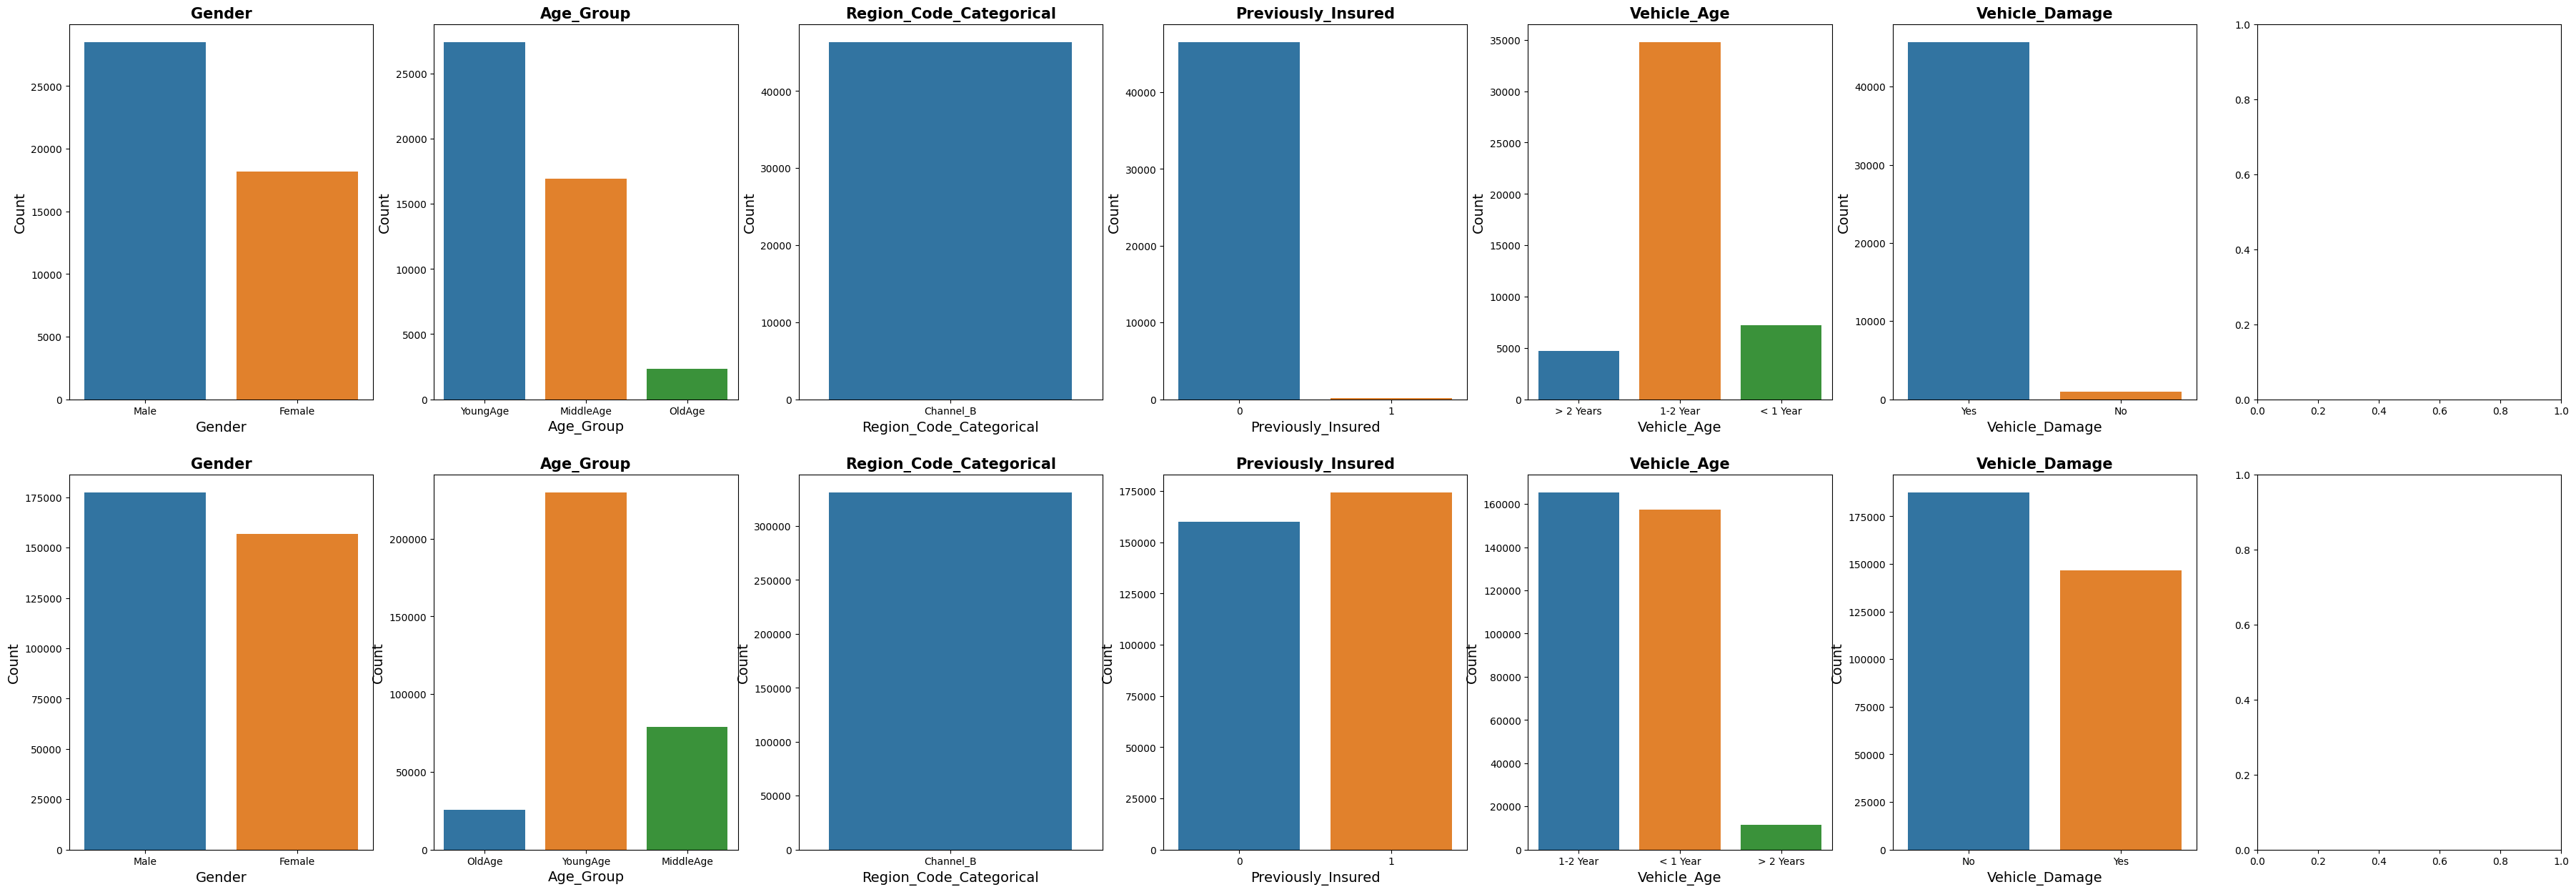

In [86]:
count_each_categorical_feature(dataset)

# **Dropping Extra Columns**

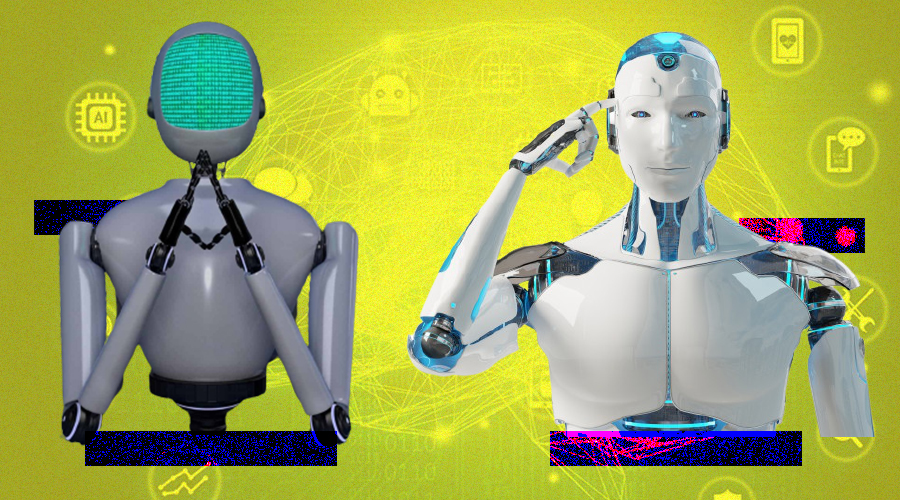

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg=regressor.fit(X_train, y_train)


In [ ]:
trace0=go.Scatter(
    x=X_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=reg.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
Dataset=[trace0,trace1]
layout.xaxis.title.text='Month'
plot2=go.Figure(data=Dataset,layout=layout)

In [ ]:
iplot(plot2)

From the graph above, we see that there is a gap between predicted and actual data points. Statistically, this gap/difference is called residuals and commonly called error, and is used in RMSE and MAE.

In [ ]:
reg.score(X_train, y_train)


0.3297357591817899

Score means r2_score

In [ ]:
reg.coef_

array([193.06674071])

Coefficient means value of independent variables(x in linear regression equation)

In [ ]:
reg.intercept_

11.602168994032127

It means beta value of linear regression equation

**Predicting Training and Testing Data**

In [ ]:
y_pred_train = reg.predict(X_train)

In [ ]:
y_pred_train

array([ 60.44291518, 100.39027176, 131.40779042, 120.32750174,
       201.31566444,  38.24588949,  44.91593169, 113.69390785,
       135.85448523, 184.65878309,  32.70574514, 160.27485832,
        93.72022956, 173.57849441,  29.35249988, 126.99754394,
       142.56097575,  55.99622038, 183.52888523,  36.05899041,
       130.27789256, 186.8821305 , 151.41791703,  90.3669843 ,
       189.1054779 , 136.98438309,  41.56268643, 140.30118003,
       158.05151092, 118.10415434, 204.6689097 , 107.02386565,
        80.38014515,  13.8255164 ,  77.02689989, 115.95370357,
       116.97425648,  59.34946564,  22.75535432, 103.67062039,
        92.5903317 , 197.9988675 , 132.50123997, 170.22524915,
       111.47056045, 164.72155312, 196.86896964,  67.07650907,
       192.45872316, 187.97558004,  82.60349256, 145.84132437,
       148.06467177,  88.18008522,  65.94661121,  64.85316166,
       105.89396779,  25.99925462, 156.92161306,  37.11599163,
       191.3288253 ,  33.79919469,  28.22260202,  98.16

This is predicted train value

In [ ]:
y_train

Date
2009-12-01     53.41
2012-12-01     92.84
2015-04-01    167.96
2014-06-01    108.38
2020-07-01     11.95
               ...  
2014-11-01    142.08
2011-11-01     54.49
2016-01-01    149.38
2010-03-01     50.97
2020-08-01     14.37
Name: Close, Length: 140, dtype: float64

This is actual train value. We see that it is not perfectly match.

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 71.52320387, 181.37843447,  81.4735947 ,  72.65310173,
       146.97122223, 123.680747  ,  19.40210906, 185.75223264,
       155.90106015, 110.37711091, 165.85145098, 171.35514701,
        17.17876166, 119.19760388, 194.68207056, 114.82380571,
        48.26917695,  31.57584729,  79.25024729,  68.16995861,
        84.82683996,  52.64297512,  16.0488638 , 149.19456963,
        78.15679775, 133.63113782, 150.32446749, 180.24853661,
       134.72458737, 190.23537576,  40.46923689,  73.74655127,
       162.49820572,  61.57281304,  20.4955586 ])

In [ ]:
y_test

Date
2010-10-01     71.86
2019-01-01    194.30
2011-07-01     62.13
2010-11-01     61.21
2016-06-01    221.30
2014-09-01    111.70
2006-11-01     25.32
2019-05-01    147.95
2017-02-01    290.56
2013-09-01     57.50
2017-11-01    306.80
2018-04-01    362.05
2006-09-01     18.46
2014-05-01    113.89
2020-01-01     39.20
2014-01-01     61.59
2009-01-01     12.24
2007-10-01     43.48
2011-05-01     60.07
2010-07-01     58.99
2011-10-01     62.90
2009-05-01     25.12
2006-08-01     17.84
2016-08-01    272.56
2011-04-01     61.02
2015-06-01    168.60
2016-09-01    250.85
2018-12-01    181.75
2015-07-01    165.74
2019-09-01     41.45
2008-06-01     22.85
2010-12-01     62.54
2017-08-01    351.15
2010-01-01     49.84
2006-12-01     26.97
Name: Close, dtype: float64

# **Regression Model Evaluation Metrices**

Now I am applying linear regression on the particular dataset and after that, we will study each evaluation metric and check it on our Linear Regression model.

In [ ]:
mean_squared_error(y_test, y_pred)

5750.96212505142

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

79.88584413759965

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

75.83509823987453

In [ ]:
r2_score(y_train, y_pred_train)

0.3297357591817899

In [ ]:
r2_score(y_test, y_pred)

0.4509856329790981

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.4509856329790981
Adjusted R2 :  0.4343488339784647


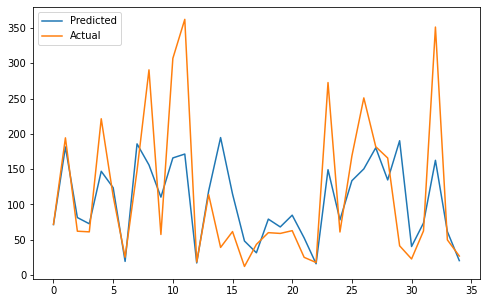

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

From the above graph, blue color line indicate predicted price of the yes bank stock and orange color line indicate actual price of yes bank stock.
It is clear that from above observation predicted line and actual line not perfectly matched. In some observation there are some big error.
Let us try to used regularisation techniques.

If training score is high and testing score is low. In that case we used regularisation technique.
But our case both training and testing score is low and not much difference between them. But till we try to used regularization technique as it may be be usefull to our model.

# **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.32973575916931996

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+05, tolerance: 1.095e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+04, tolerance: 9.231e+01



GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -6748.172854643689


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

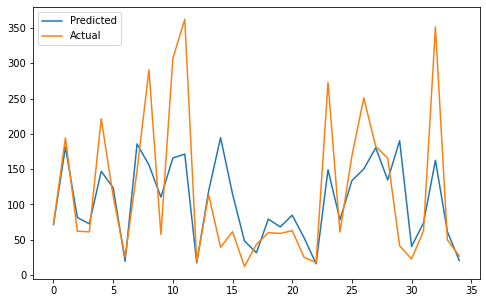

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# **Lasso Regression Evaluation Metrices**

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 5751.969154680486
RMSE : 75.84173755051032
R2 : 0.4508894971113335
Adjusted R2 :  0.43424978490258603


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
rid=ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -6550.436196370964


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
rid.score(X_train, y_train)

-6381.750347700999

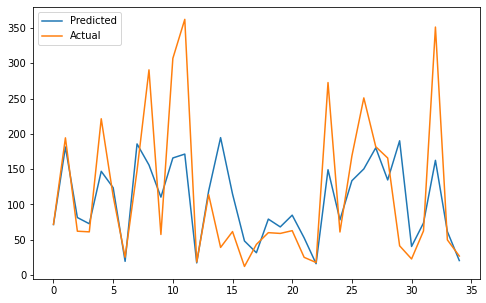

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# **Ridge Regression Evaluation Metrices**

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 5752.350310769436
RMSE : 75.84425034746823
R2 : 0.4508531101269715
Adjusted R2 :  0.4342122952823343


# **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.2835059740360455

In [ ]:
y_pred_en = elasticnet.predict(X_test)

# **Elastic Net Evaluation Metrices**

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6804.931655414075
RMSE : 82.49200964586858
R2 : 0.3503686575949668
Adjusted R2 :  0.33068285934026886


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.011e+05, tolerance: 1.121e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.690e+05, tolerance: 1.095e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.788e+05, tolerance: 9.231e+01

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.6}

Using  {'alpha': 0.01, 'l1_ratio': 0.6}  the negative mean squared error is:  -6742.772674731748


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 5832.268597788243
RMSE : 76.36929093417224
R2 : 0.44322372798065235
Adjusted R2 :  0.42635171973764185


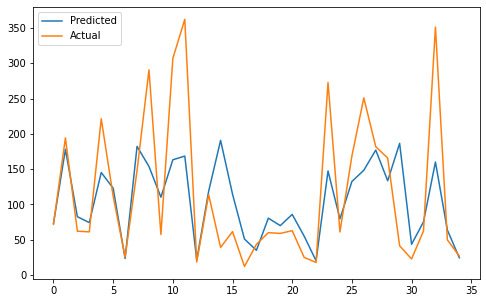

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# **Lets collect all our best models !**

It is necessary to obtain the accuracy on training data, But it is also important to get a genuine and approximate result on unseen data otherwise Model is of no use.

So to build and deploy a generalized model we require to Evaluate the model on different metrics which helps us to better optimize the performance, fine-tune it, and obtain a better result.

In [ ]:
models = [LinearRegression(),Lasso(), Ridge(), ElasticNet()]

In [ ]:
def model_metric(models,X_train, X_test, y_train, y_test):
  
  cols = ['Score', 'Coefficient', 'Intercept', 'Train MSE', 'Test MSE', 'Train RMSE',
          'Test RMSE', 'Train r2 score', 'Test r2 score', 'Test Adjusted r2 score']
  model_df = pd.DataFrame(columns=cols)
   
  i = 0
  for model in models:

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_df.loc[i,'Score'] = model.score(X_train, y_train)
    model_df.loc[i,'Coefficient'] = model.coef_
    model_df.loc[i,'Intercept'] = model.intercept_
    model_df.loc[i,'Train MSE'] = mean_squared_error(y_train, y_pred_train)
    model_df.loc[i,'Test MSE'] = mean_squared_error(y_test, y_pred)
    model_df.loc[i,'Train RMSE'] = math.sqrt(mean_squared_error(y_train, y_pred_train))
    model_df.loc[i,'Test RMSE'] = math.sqrt(mean_squared_error(y_test, y_pred))
    model_df.loc[i,'Train r2 score'] = r2_score(y_train, y_pred_train)
    model_df.loc[i,'Test r2 score'] = r2_score(y_test, y_pred)
    
    model_df.loc[i,'Test Adjusted r2 score'] = (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))).round(2)

    

    i+=1

  return model_df

In [ ]:
model_df=model_metric(models,X_train, X_test, y_train, y_test)

In [ ]:
model_df

Score           Coefficient  Intercept    Train MSE     Test MSE  \
0  0.329736  [193.06674070979258]  11.602169  6381.748094  5750.962125   
1  0.328489  [181.19388268106678]  17.581041  6393.620952  5750.962125   
2  0.327721  [177.97349737277304]  19.202746  6400.935217  5750.962125   
3  0.085712  [26.977903371886015]  95.240322  8705.156815  5750.962125   

  Train RMSE  Test RMSE Train r2 score Test r2 score Test Adjusted r2 score  
0  79.885844  75.835098       0.329736      0.450986                   0.43  
1  79.960121  75.835098       0.328489      0.450986                   0.43  
2  80.005845  75.835098       0.327721      0.450986                   0.43  
3   93.30143  75.835098       0.085712      0.450986                   0.43

Train MSE    Test MSE     Train RMSE  Test RMSE
6381.748094  5750.962125  79.885844   75.835098    AxesSubplot(0.125,0.125;0.775x0.755)
6393.620952  5750.962125  79.960121   75.835098    AxesSubplot(0.125,0.125;0.775x0.755)
6400.935217  5750.962125  80.005845   75.835098    AxesSubplot(0.125,0.125;0.775x0.755)
8705.156815  5750.962125  93.301430   75.835098    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

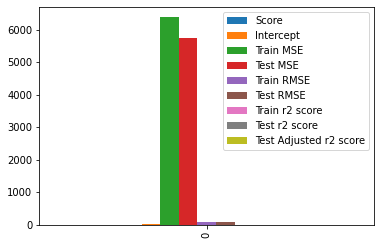

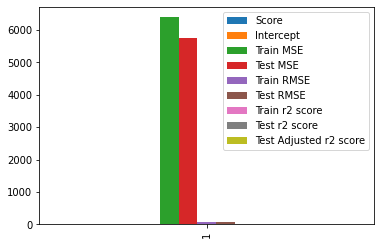

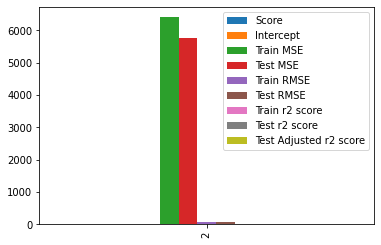

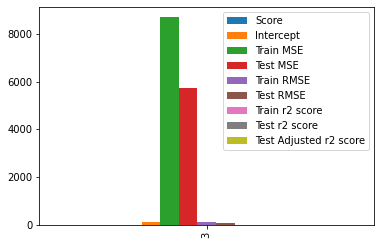

In [ ]:
model_df.groupby(['Train MSE','Test MSE','Train RMSE','Test RMSE']).plot.bar()

Both training and testing MSE and RMSE not much differece between them. So we can say that model learn more on training data set so quite well in test data set also.

R2 score of the training and testing model are small which indicated that linear regression model does not understood complex term in the training dataset.This measures the amount of variation that can be explained by our model i.e. percentage of correct predictions returned by our model.
R2 score 45 % which means  our model is capable to explain 45 per cent of the variance of data

# **Conclusion**
Linear regression is a simple technique and quite easy to interpret, but there are a few obvious disadvantages. One problem in using regression algorithms is that the model overfits to the  month column. Instead of taking into account the previous values from the point of prediction, the model will consider the value from the same a month from year ago.

As seen from the plot graph, for January 2016 and January 2017, there was a drop in the stock price. The model has predicted the same for January 2018. A linear regression technique can perform well for problems such as Big Mart sales where the independent features are useful for determining the target value.So we can conclude that as our prediction line does not matched the actual line and  R2 score is 45 %.So linear regression model does not perform well.

 